# Objective

* Identify the Which Platform have more impact on Sales 

* To build the Model which will help to Predict the future sales based on Money invest in Different Platform 

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [2]:
new = pd.read_csv(r"C:\Users\Dell\Desktop\Machine Learning\oasis\Advertising.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data Type 

In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Univariate Analysis

In [4]:
# Let's look at some statistical information about our dataframe.
new.describe() 

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

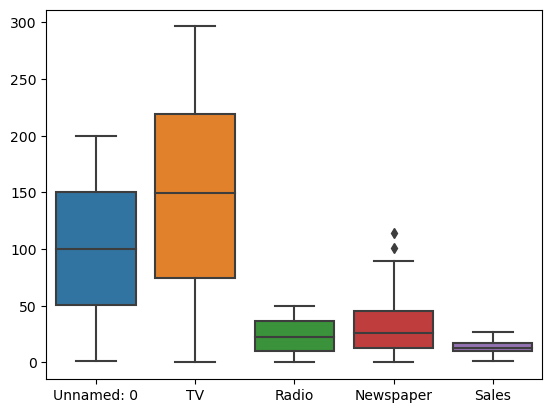

In [5]:
sns.boxplot(data=new)

### Winsorizing Technique -- Treatment of Outlier

In [6]:
q1 = new['Newspaper'].quantile(0.25)
q3 = new['Newspaper'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
#low_limit

93.625

In [7]:
new['Newspaper']=np.where(new['Newspaper'] > upper_limit,upper_limit,new['Newspaper']) # upper limit

<AxesSubplot:>

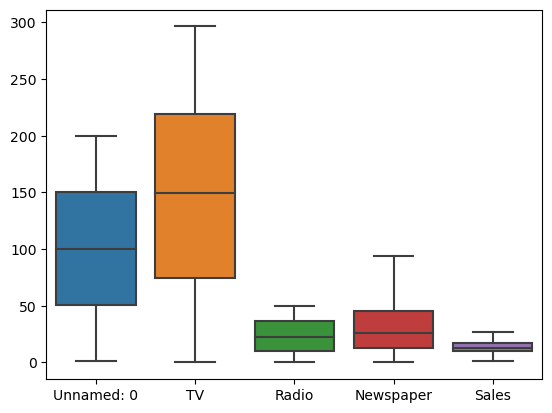

In [8]:
sns.boxplot(data=new)

### Missing Value

In [9]:
new.isna().sum()  # no missing data

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [10]:
new.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
# Putting feature variable to X
X = new.drop('Sales', axis= 1)

# Putting response variable to y
y = new[['Sales']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [12]:
X.head()

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [13]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Sales,Unnamed: 0,TV,Radio,Newspaper
111,21.8,112,241.7,38.0,23.2
156,15.3,157,93.9,43.5,50.5
140,10.9,141,73.4,17.0,12.9
171,14.5,172,164.5,20.9,47.4
157,10.1,158,149.8,1.3,24.3


# Correlation Matrix

In [14]:
df.corr()

,Sales,Unnamed: 0,TV,Radio,Newspaper
Sales,1.000000,-0.135450,0.813611,0.616691,0.220532
Unnamed: 0,-0.135450,1.000000,-0.086065,-0.118226,-0.149757
TV,0.813611,-0.086065,1.000000,0.147367,0.073830
Radio,0.616691,-0.118226,0.147367,1.000000,0.300592
Newspaper,0.220532,-0.149757,0.073830,0.300592,1.000000


<AxesSubplot:>

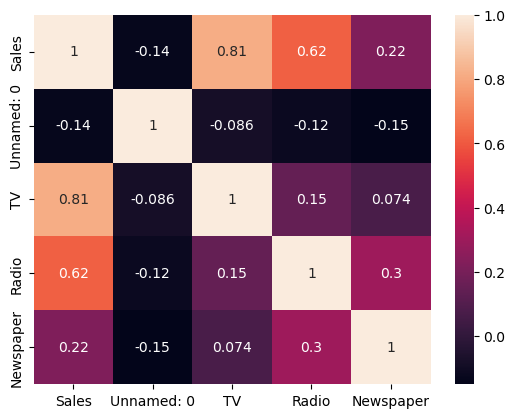

In [15]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'Sales vs TV'}, xlabel='TV', ylabel='Sales'>

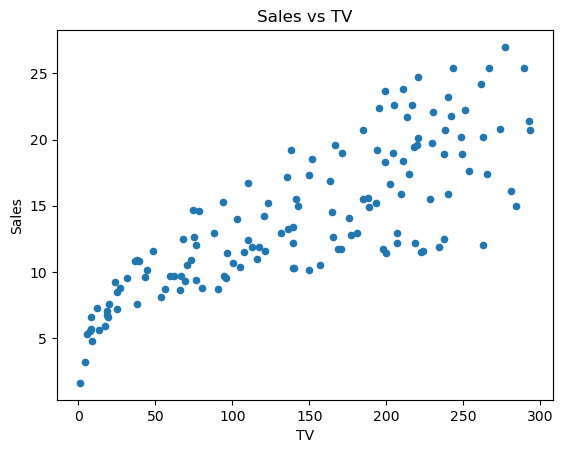

In [16]:
df.plot.scatter(x='TV', y='Sales', title='Sales vs TV')

#### TV have 81%  strong positve correlation with Sales

* TV have high impact on Sales
* There is no colinearity in data, So every platform is independent 

### Multicolinearity (with the help of VIF)

In [17]:
X1=df.drop(['Sales'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Unnamed: 0    2.548868
TV            3.168152
Radio         3.518712
Newspaper     2.911983
dtype: float64

* No collinearity in the data, indicate no multi colinearity 

# Model Building

*  H0 :- There is no Linear relationship between sales and tv , radio & newspaper

* Vs 

*  H1 :- There is Linear relationship between sales and tv , radio & newspaper

Alpha = 0.05 (5%)

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('Sales ~ TV + Radio + Newspaper',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     484.5
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.22e-72
Time:                        20:29:42   Log-Likelihood:                -262.57
No. Observations:                 140   AIC:                             533.1
Df Residuals:                     136   BIC:                             544.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7452      0.349      7.867      0.000       2.055       3.435
TV             0.0476      0.002     29.101      0.000       0.044       0.051
Radio          0.1847      0.010     18.978      0.000       0.165       0.204
Newspaper      0.0038      0.007      0.558      0.578      -0.010       0.017
==============================================================================
Omnibus:                       56.768   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.422
Skew:                          -1.499   Prob(JB):                     2.23e-43
Kurtosis:                       7.968   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between sales and tv , radio
* There is no Linear relationship between sales and NewsPaper 
 * so we will remove and re-run the model 
* 91% is accuracy of model , so we say model is good fit 

In [19]:
# removing the insignificant variable 
model2=smf.ols('Sales ~ TV+ Radio',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     730.3
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           8.49e-74
Time:                        20:29:42   Log-Likelihood:                -262.73
No. Observations:                 140   AIC:                             531.5
Df Residuals:                     137   BIC:                             540.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8144      0.325      8.651      0.000       2.171       3.458
TV             0.0476      0.002     29.206      0.000       0.044       0.051
Radio          0.1863      0.009     20.076      0.000       0.168       0.205
==============================================================================
Omnibus:                       58.726   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.934
Skew:                          -1.537   Prob(JB):                     5.78e-47
Kurtosis:                       8.201   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between sales and tv , radio
* 91% is accuracy of model , so we say model is good fit 
* Y = 2.8144 + 0.0476 * TV + 0.1863 * Radio

# Multicolinearity (with the help of VIF)

In [20]:
X1=df.loc[:,['TV', 'Radio']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

TV       2.475632
Radio    2.475632
dtype: float64

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [21]:
df.head()

,Sales,Unnamed: 0,TV,Radio,Newspaper
111,21.8,112,241.7,38.0,23.2
156,15.3,157,93.9,43.5,50.5
140,10.9,141,73.4,17.0,12.9
171,14.5,172,164.5,20.9,47.4
157,10.1,158,149.8,1.3,24.3


In [22]:
# Y = intercet + b1 * Tv + b2 * radio
Y = 2.8144 + 0.0476 * 241.7  + 0.1863 * 38
Y

21.39872

In [23]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,Sales,Unnamed: 0,TV,Radio,Newspaper,fitted_value,residual
111,21.8,112,241.7,38.0,23.2,21.403283,0.396717
156,15.3,157,93.9,43.5,50.5,15.388970,-0.088970
140,10.9,141,73.4,17.0,12.9,9.476577,1.423423
171,14.5,172,164.5,20.9,47.4,14.541545,-0.041545
157,10.1,158,149.8,1.3,24.3,10.190620,-0.090620


# Linearity

<AxesSubplot:title={'center':'Sales vs TV'}, xlabel='TV', ylabel='Sales'>

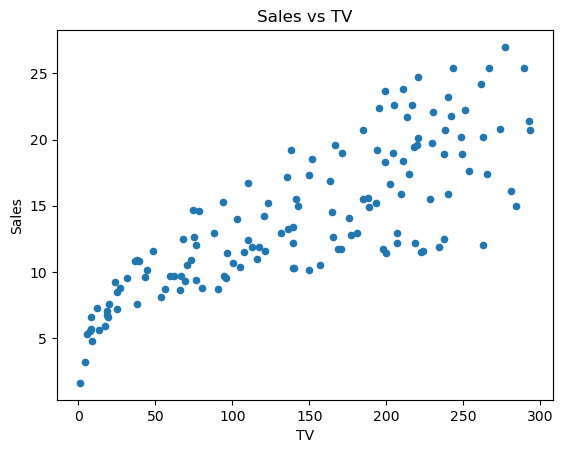

In [24]:
df.plot.scatter(x='TV', y='Sales', title='Sales vs TV')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

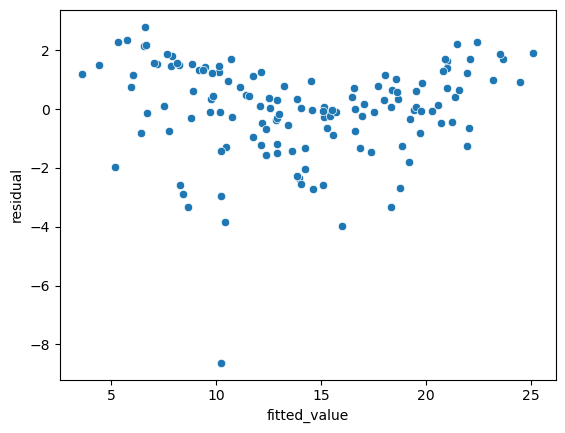

In [25]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

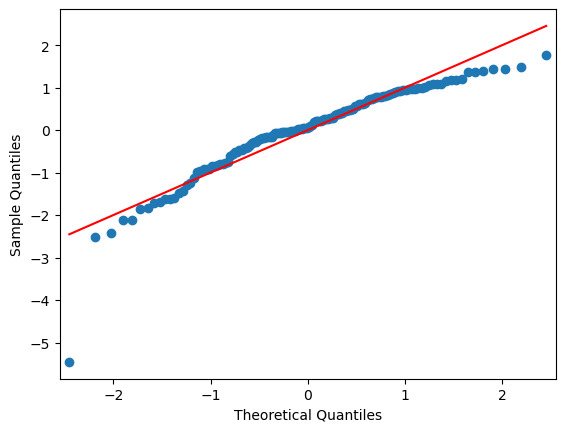

In [26]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

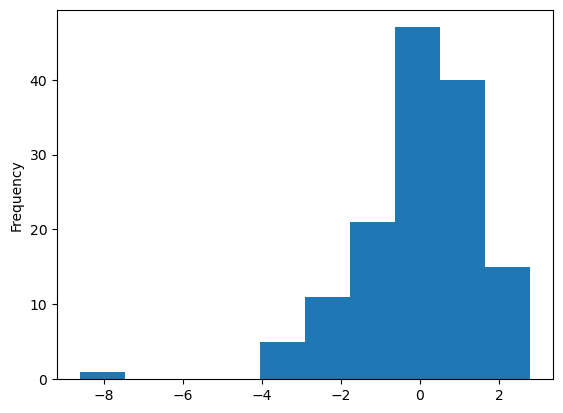

In [27]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [28]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
87,88,110.7,40.6,63.2,16.0
118,119,125.7,36.9,79.2,15.9
80,81,76.4,26.7,22.3,11.8
198,199,283.6,42.0,66.2,25.5
62,63,239.3,15.5,27.3,15.7


In [29]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Prediction
87,88,110.7,40.6,63.2,16.0,15.648871
118,119,125.7,36.9,79.2,15.9,15.674035
80,81,76.4,26.7,22.3,11.8,11.426249
198,199,283.6,42.0,66.2,25.5,24.143790
62,63,239.3,15.5,27.3,15.7,17.097952


In [30]:
Y = 2.8144 + 0.0476 * 110.7 + 0.1863 * 40.6  # one row prediction ( Manual)
Y

15.6475

# Test

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Sales, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.84


# Train

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Sales, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.91


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Conclusion

* We got to know from this Data model that 
  the Train Data accuracy is 91% &
  Test Data accuracy is 84%
* Sales has high Correlation with TV
* All the Assumptions of Linear Regression are approved
* Hence we can say that the model is Good Fit
* We can use this model for future Sales Prediction


# Finish